# Packages

In [1]:
import sys
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import sklearn.metrics
from sklearn.model_selection import train_test_split
import random
import cebra
from cebra import CEBRA
import cebra.grid_search
import time
import joblib as jl
from matplotlib.collections import LineCollection
import cebra.integrations.plotly
import os
import torch
%matplotlib inline

In [2]:
conf_dir = "/scratch/09117/xz6783/Xu/PL_miniscope/PL/Analysis/Cat_Odor_Conflict/Conflict/extracted_data/Calcium"
source_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/training/data"
output_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/training/output"
model_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/visualization/models"
animal_id = '2I5'

# 1. Dataset

In [3]:
Dt = pd.read_csv(os.path.join(source_dir, f'{animal_id}.csv'), index_col= 0)
# Split
Y = Dt.iloc[:, 0:7]
X = Dt.iloc[:, 7:]
# View data
Dt

Timepoint         Time     Speed  Freezing  In Food Area  \
0             1     0.499571  0.026190       0.0        0.0000   
1             2     1.537900  0.041649       0.0        0.0000   
2             3     2.549300  0.129952       0.0        0.3675   
3             4     3.560900  0.030860       0.0        1.0000   
4             5     4.572900  0.019806       0.0        1.0000   
...         ...          ...       ...       ...           ...   
1770       1771  1792.454500  0.000000       1.0        0.0000   
1771       1772  1792.579000  0.000000       1.0        0.0000   
1772       1773  1792.579000  0.000000       1.0        0.0000   
1773       1774  1792.579000  0.000000       1.0        0.0000   
1774       1775  1792.579000  0.000000       1.0        0.0000   

      In Hidden Area  Bar Press active         0         1           2  ...  \
0           1.000000              0.00  0.000000  0.000000    0.000000  ...   
1           1.000000              0.00  0.000000  0.000000    0.000000  ...   
2           0.007895              0.00  0.000000  0.000000    0.000000  ...   
3           0.000000              0.30  0.000000  0.000000    0.000000  ...   
4           0.000000              0.15  0.000000  0.000000  116.331466  ...   
...              ...               ...       ...       ...         ...  ...   
1770        1.000000              0.00  0.707592  1.654004  172.566795  ...   
1771        1.000000              0.00  0.606639  1.464108  173.853374  ...   
1772        1.000000              0.00  0.520088  1.296013  162.067323  ...   
1773        1.000000              0.00  0.445887  1.147218  147.636002  ...   
1774        1.000000              0.00  0.380841  1.012478  134.181500  ...   

            128        129         130        131         132        133  \
0      0.000000   0.000000    0.000000   0.000000    0.000000   0.000000   
1      0.000000   0.000000    0.000000   0.000000    0.000000   0.000000   
2      3.193001   0.000000    0.000000   0.000000    6.400005   0.000000   
3     12.867394   0.000000    0.000000   5.576823   18.778582   0.000000   
4     11.290958   2.413726    3.899698  30.767781   18.299839   0.000000   
...         ...        ...         ...        ...         ...        ...   
1770  16.697797  21.406706  153.501237  65.351870  119.415868  72.117965   
1771  21.708866  22.528439  145.202108  60.353983  121.641317  69.993939   
1772  38.151781  20.261302  137.351676  55.839169  124.484340  67.932471   
1773  36.671196  18.222318  129.925681  60.831288  114.832183  65.931717   
1774  32.075833  16.345911  122.732138  58.379971  105.717851  63.942328   

           134        135        136        137  
0     0.000000   0.000000   0.000000   0.000000  
1     0.000000   0.000000   0.000000   0.000000  
2     0.000000   6.285662   0.000000   0.000000  
3     0.000000   6.815444   0.000000   0.000000  
4     0.000000  15.201510   0.000000   0.000000  
...        ...        ...        ...        ...  
1770  0.231196  84.197811  19.415544  39.634189  
1771  0.204435  81.513892  17.289795  36.186032  
1772  0.180771  86.218183  18.329636  33.037862  
1773  0.159847  82.789053  23.848226  30.163582  
1774  0.140919  78.919135  21.027441  27.477742  

[1775 rows x 145 columns]

In [4]:
X

0         1           2          3          4          5  \
0     0.000000  0.000000    0.000000   0.000000   0.000000   0.000000   
1     0.000000  0.000000    0.000000   0.000000   0.539948   0.000000   
2     0.000000  0.000000    0.000000   0.000000  22.300369   0.000000   
3     0.000000  0.000000    0.000000   0.000000  25.195590   4.958827   
4     0.000000  0.000000  116.331466  70.755602  23.773180  37.129407   
...        ...       ...         ...        ...        ...        ...   
1770  0.707592  1.654004  172.566795  14.281693  81.963048  37.115461   
1771  0.606639  1.464108  173.853374  16.205629  87.206669  42.769176   
1772  0.520088  1.296013  162.067323  18.758598  82.283440  38.731499   
1773  0.445887  1.147218  147.636002  16.759730  77.638150  35.075004   
1774  0.380841  1.012478  134.181500  14.932546  73.149817  31.686388   

              6         7          8          9  ...        128        129  \
0      0.000000  0.000000   0.000000   0.000000  ...   0.000000   0.000000   
1      0.000000  0.000000   0.542036   0.000000  ...   0.000000   0.000000   
2      0.000000  3.092045   8.516805   5.556188  ...   3.193001   0.000000   
3      0.000000  6.645071   9.297426  19.923566  ...  12.867394   0.000000   
4      0.000000  7.467981   8.342649  18.132379  ...  11.290958   2.413726   
...         ...       ...        ...        ...  ...        ...        ...   
1770  14.974377  8.167806  20.083272  48.998279  ...  16.697797  21.406706   
1771  13.615424  7.043091  19.328855  54.402581  ...  21.708866  22.528439   
1772  11.911210  6.073251  17.343925  49.467067  ...  38.151781  20.261302   
1773  10.420308  5.236958  18.633399  49.769683  ...  36.671196  18.222318   
1774   9.086289  4.499551  19.109177  45.908193  ...  32.075833  16.345911   

             130        131         132        133       134        135  \
0       0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   
1       0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   
2       0.000000   0.000000    6.400005   0.000000  0.000000   6.285662   
3       0.000000   5.576823   18.778582   0.000000  0.000000   6.815444   
4       3.899698  30.767781   18.299839   0.000000  0.000000  15.201510   
...          ...        ...         ...        ...       ...        ...   
1770  153.501237  65.351870  119.415868  72.117965  0.231196  84.197811   
1771  145.202108  60.353983  121.641317  69.993939  0.204435  81.513892   
1772  137.351676  55.839169  124.484340  67.932471  0.180771  86.218183   
1773  129.925681  60.831288  114.832183  65.931717  0.159847  82.789053   
1774  122.732138  58.379971  105.717851  63.942328  0.140919  78.919135   

            136        137  
0      0.000000   0.000000  
1      0.000000   0.000000  
2      0.000000   0.000000  
3      0.000000   0.000000  
4      0.000000   0.000000  
...         ...        ...  
1770  19.415544  39.634189  
1771  17.289795  36.186032  
1772  18.329636  33.037862  
1773  23.848226  30.163582  
1774  21.027441  27.477742  

[1775 rows x 138 columns]

# 2. Model setup

## (1). Train test split

In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2024)

# Sort dataset by row index
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

## (2). Hyperparameter setup

distance = 'cosine'
time_offsets = 10
batch_size = None
learning_rate = 0.001
conditional = 'time_delta'
output_dimension = 3
num_hidden_units = 50
max_iterations = 10000
temperature = 1

# 3. Model building

## (1). [Freezing, In Hidden Area]

## Best Model Hyperparameters

In [6]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 1) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 1) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 1) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 1) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 1) {animal_id}.csv'), index_col=0)

In [7]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
12   cosine             auto            10         NaN            0.1   

   conditional  output_dimension  num_hidden_units  max_iterations  \
12  time_delta                15                32            7500   

    Accuracy_Testing  
12          5.618762

In [8]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
y_train_comb = y_train.iloc[:, [3, 5]].to_numpy()


### These hyperparameters are used to build up models which only vary a parameter for temperature

In [9]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb1 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb1 = cebra_behavior_model_comb1.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb1 =CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb1 = cebra_behavior_model_00001_comb1.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb1 = cebra_behavior_model_01_comb1.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb1 = cebra_behavior_model_2_comb1.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb1 = cebra_behavior_model_3_comb1.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb1 = cebra_behavior_model_5_comb1.transform(X_train)

pos: -0.7053 neg:  7.4510 total:  6.7458 temperature:  1.0000: 100%|██████████| 10000/10000 [04:30<00:00, 36.98it/s]
pos: -997.3290 neg:  1002.9196 total:  5.5906 temperature:  0.0010: 100%|██████████| 10000/10000 [04:42<00:00, 35.46it/s]
pos: -7.4438 neg:  13.1871 total:  5.7433 temperature:  0.1000: 100%|██████████| 10000/10000 [04:30<00:00, 37.03it/s]
pos: -0.5000 neg:  7.7570 total:  7.2570 temperature:  2.0000: 100%|██████████| 10000/10000 [04:35<00:00, 36.31it/s]
pos: -0.2607 neg:  7.3053 total:  7.0446 temperature:  3.0000: 100%|██████████| 10000/10000 [04:38<00:00, 35.89it/s]
pos: -0.1718 neg:  7.3023 total:  7.1306 temperature:  5.0000: 100%|██████████| 10000/10000 [04:39<00:00, 35.76it/s]


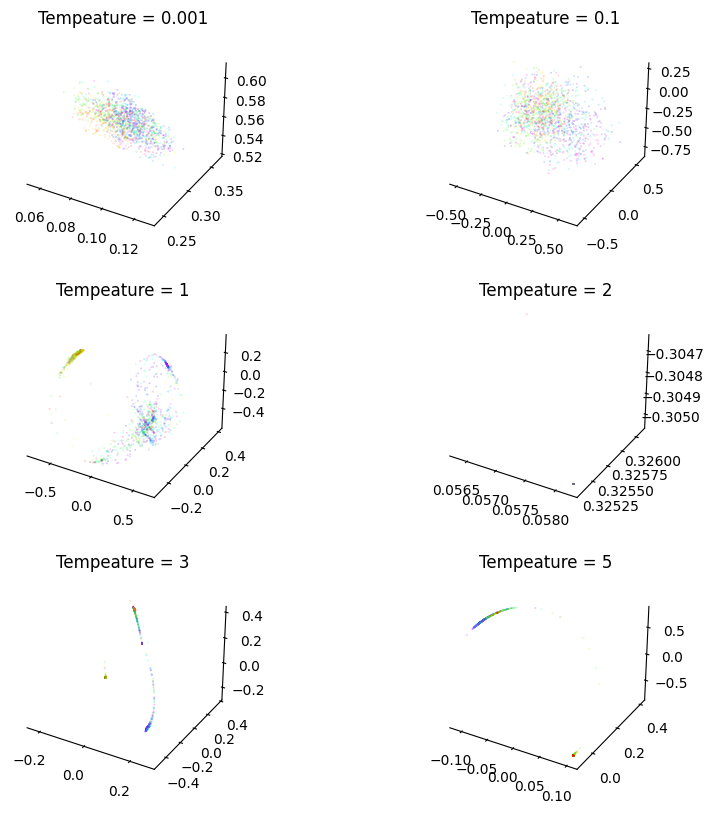

In [10]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [11]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb1 = cebra_time_model_025_comb1.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb1 = cebra_time_model_05_comb1.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb1 = cebra_time_model_075_comb1.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb1 = cebra_time_model_125_comb1.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb1 = cebra_time_model_15_comb1.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb1 = cebra_time_model_175_comb1.transform(X_train)

pos: -2.6050 neg:  8.7756 total:  6.1706 temperature:  0.2500: 100%|██████████| 10000/10000 [04:25<00:00, 37.73it/s]
pos: -1.2038 neg:  7.6746 total:  6.4708 temperature:  0.5000: 100%|██████████| 10000/10000 [04:25<00:00, 37.61it/s]
pos: -0.9114 neg:  7.5403 total:  6.6288 temperature:  0.7500: 100%|██████████| 10000/10000 [04:18<00:00, 38.70it/s]
pos: -0.5838 neg:  7.3992 total:  6.8154 temperature:  1.2500: 100%|██████████| 10000/10000 [04:19<00:00, 38.47it/s]
pos: -0.4899 neg:  7.3883 total:  6.8983 temperature:  1.5000: 100%|██████████| 10000/10000 [04:17<00:00, 38.87it/s]
pos: -0.4350 neg:  7.3677 total:  6.9326 temperature:  1.7500: 100%|██████████| 10000/10000 [04:24<00:00, 37.82it/s]


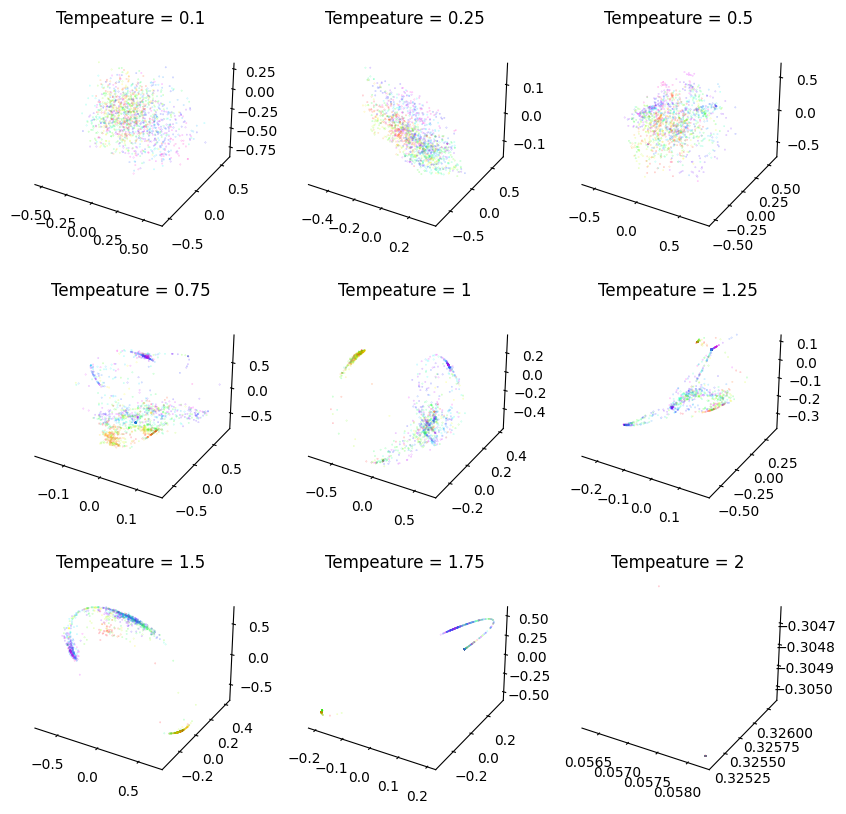

In [12]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [13]:
# Extract outcomes
y_train_comb = y_train.iloc[:, [3, 5]].to_numpy()

# Model
cebra_behavior_model_comb1 = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb1.fit(X_train, y_train_comb)
cebra_behavior_model_comb1_embedding = cebra_behavior_model_comb1.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss1 = cebra_behavior_model_comb1.state_dict_['loss']

pos: -0.3674 neg:  7.3298 total:  6.9624 temperature:  2.0000: 100%|██████████| 10000/10000 [04:44<00:00, 35.20it/s]


In [14]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb1_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Freezing, In Hidden Area]",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [15]:
np.random.seed(999)
# Extract outcomes
y_train_comb = y_train.iloc[:, [3, 5]].to_numpy()

# Model_shuffled
cebra_behavior_model_comb1_shuffled = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb1_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb1_embedding_shuffled = cebra_behavior_model_comb1_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss1_shuffled = cebra_behavior_model_comb1_shuffled.state_dict_['loss']

pos: -0.5000 neg:  7.7570 total:  7.2570 temperature:  2.0000: 100%|██████████| 10000/10000 [04:38<00:00, 35.87it/s]


In [16]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb1_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Freezing, In Hidden Area] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [17]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb1_embedding {animal_id}.csv"), cebra_behavior_model_comb1_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb1_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb1_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss1, os.path.join(model_dir,f"InfoNCELoss1 {animal_id}.pt"))
torch.save(InfoNCELoss1_shuffled, os.path.join(model_dir,f"InfoNCELoss1_shuffled {animal_id}.pt"))


## (2). [In Food Area, Bar Press Active]

## Best Model Hyperparameters

In [18]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 2) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 2) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 2) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 2) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 2) {animal_id}.csv'), index_col=0)

In [19]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
13   cosine             auto            10         NaN          0.001   

   conditional  output_dimension  num_hidden_units  max_iterations  \
13  time_delta                15                50            7500   

    Accuracy_Testing  
13          5.850469

In [20]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
temperature = 1

In [21]:
y_train_comb = y_train.iloc[:, [4, 6]].to_numpy()

In [22]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb2 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb2 = cebra_behavior_model_comb2.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb2 =CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb2 = cebra_behavior_model_00001_comb2.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb2 = cebra_behavior_model_01_comb2.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb2 = cebra_behavior_model_2_comb2.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb2 = cebra_behavior_model_3_comb2.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb2 = cebra_behavior_model_5_comb2.transform(X_train)

pos: -0.5225 neg:  7.4415 total:  6.9190 temperature:  1.0000: 100%|██████████| 10000/10000 [04:35<00:00, 36.28it/s]
pos: -996.6389 neg:  1001.9896 total:  5.3506 temperature:  0.0010: 100%|██████████| 10000/10000 [04:36<00:00, 36.22it/s]
pos: -7.3771 neg:  13.2009 total:  5.8238 temperature:  0.1000: 100%|██████████| 10000/10000 [04:35<00:00, 36.28it/s]
pos: -0.2696 neg:  7.3330 total:  7.0634 temperature:  2.0000: 100%|██████████| 10000/10000 [04:35<00:00, 36.35it/s]
pos: -0.1992 neg:  7.3082 total:  7.1090 temperature:  3.0000: 100%|██████████| 10000/10000 [04:28<00:00, 37.21it/s]
pos: -0.1179 neg:  7.2866 total:  7.1688 temperature:  5.0000: 100%|██████████| 10000/10000 [04:21<00:00, 38.18it/s]


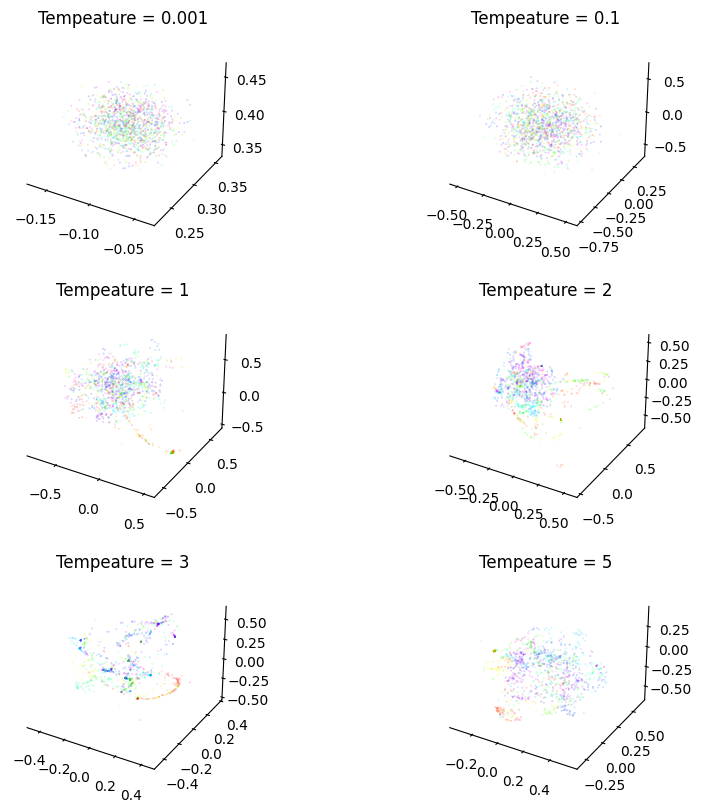

In [23]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [24]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb2 = cebra_time_model_025_comb2.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb2 = cebra_time_model_05_comb2.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb2 = cebra_time_model_075_comb2.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb2 = cebra_time_model_125_comb2.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb2 = cebra_time_model_15_comb2.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb2 = cebra_time_model_175_comb2.transform(X_train)

pos: -2.3841 neg:  8.7100 total:  6.3259 temperature:  0.2500: 100%|██████████| 10000/10000 [04:34<00:00, 36.37it/s]
pos: -1.0930 neg:  7.7596 total:  6.6666 temperature:  0.5000: 100%|██████████| 10000/10000 [04:38<00:00, 35.96it/s]
pos: -0.7064 neg:  7.5214 total:  6.8150 temperature:  0.7500: 100%|██████████| 10000/10000 [04:23<00:00, 37.92it/s]
pos: -0.4180 neg:  7.3937 total:  6.9757 temperature:  1.2500: 100%|██████████| 10000/10000 [04:21<00:00, 38.23it/s]
pos: -0.3618 neg:  7.3679 total:  7.0062 temperature:  1.5000: 100%|██████████| 10000/10000 [04:34<00:00, 36.49it/s]
pos: -0.3264 neg:  7.3470 total:  7.0206 temperature:  1.7500: 100%|██████████| 10000/10000 [04:34<00:00, 36.38it/s]


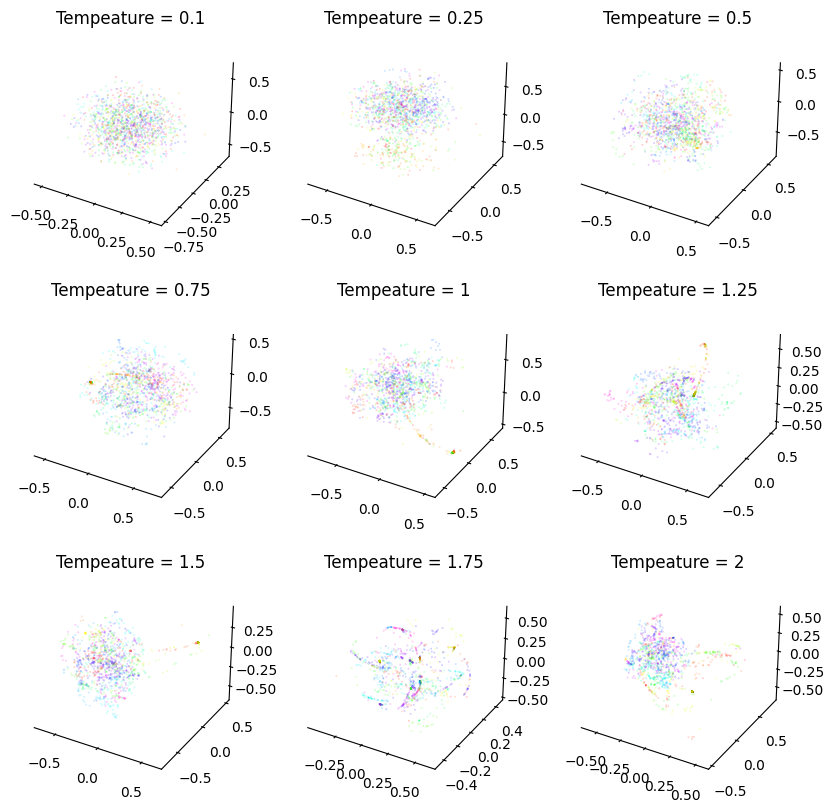

In [25]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [26]:
# Extract outcomes
y_train_comb = y_train.iloc[:, [4, 6]].to_numpy()

# Model
cebra_behavior_model_comb2 = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb2.fit(X_train, y_train_comb)
cebra_behavior_model_comb2_embedding = cebra_behavior_model_comb2.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss2 = cebra_behavior_model_comb2.state_dict_['loss']

pos: -0.2789 neg:  7.3353 total:  7.0564 temperature:  2.0000: 100%|██████████| 10000/10000 [04:34<00:00, 36.49it/s]


In [27]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb2_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[In Food Area, Bar Press Active]",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [28]:
np.random.seed(999)
# Extract outcomes

# Model_shuffled
cebra_behavior_model_comb2_shuffled = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb2_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb2_embedding_shuffled = cebra_behavior_model_comb2_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss2_shuffled = cebra_behavior_model_comb2_shuffled.state_dict_['loss']

pos: -0.2452 neg:  7.3414 total:  7.0963 temperature:  2.0000: 100%|██████████| 10000/10000 [04:35<00:00, 36.25it/s]


In [29]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb2_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[In Food Area, Bar Press Active] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [30]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb2_embedding {animal_id}.csv"), cebra_behavior_model_comb2_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb2_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb2_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss2, os.path.join(model_dir,f"InfoNCELoss2 {animal_id}.pt"))
torch.save(InfoNCELoss2_shuffled, os.path.join(model_dir,f"InfoNCELoss2_shuffled {animal_id}.pt"))


## (3). [Freezing, In Hidden Area, In Food Area, Bar Press Active]

## Best Model Hyperparameters

In [57]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 3) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 3) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 3) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 3) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 3) {animal_id}.csv'), index_col=0)

In [ ]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

In [ ]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
temperature = 1

In [ ]:
y_train_comb = y_train.iloc[:, [3,4,5,6]].to_numpy()

In [ ]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb3 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb3 = cebra_behavior_model_comb3.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb3 =CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb3 = cebra_behavior_model_00001_comb3.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb3 = cebra_behavior_model_01_comb3.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb3 = cebra_behavior_model_2_comb3.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb3 = cebra_behavior_model_3_comb3.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb3 = cebra_behavior_model_5_comb3.transform(X_train)

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [ ]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb3 = cebra_time_model_025_comb3.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb3 = cebra_time_model_05_comb3.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb3 = cebra_time_model_075_comb3.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb3 = cebra_time_model_125_comb3.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb3 = cebra_time_model_15_comb3.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb3 = cebra_time_model_175_comb3.transform(X_train)

In [ ]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [ ]:
# Model
cebra_behavior_model_comb3 = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb3.fit(X_train, y_train_comb)
cebra_behavior_model_comb3_embedding = cebra_behavior_model_comb3.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss3 = cebra_behavior_model_comb3.state_dict_['loss']

In [ ]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb3_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Freezing, In Hidden Area, In Food Area, Bar Press Active]",
                                                           cmap = "gist_rainbow")
fig.show()

In [ ]:
np.random.seed(999)
# Extract outcomes

# Model_shuffled
cebra_behavior_model_comb3_shuffled = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb3_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb3_embedding_shuffled = cebra_behavior_model_comb3_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss3_shuffled = cebra_behavior_model_comb3_shuffled.state_dict_['loss']

In [ ]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb3_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Freezing, In Hidden Area, In Food Area, Bar Press Active] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

In [ ]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb3_embedding {animal_id}.csv"), cebra_behavior_model_comb3_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb3_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb3_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss3, os.path.join(model_dir,f"InfoNCELoss3 {animal_id}.pt"))
torch.save(InfoNCELoss3_shuffled, os.path.join(model_dir,f"InfoNCELoss3_shuffled {animal_id}.pt"))

## (4). [Speed]

## Best Model Hyperparameters

In [32]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 4) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 4) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 4) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 4) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 4) {animal_id}.csv'), index_col=0)

In [33]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
11   cosine             auto            10         NaN         0.0001   

   conditional  output_dimension  num_hidden_units  max_iterations  \
11  time_delta                10                75            7500   

    Accuracy_Testing  
11          6.845109

In [34]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
temperature = 1
y_train_comb = y_train.iloc[:, [2]].to_numpy()

In [35]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb4 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb4 = cebra_behavior_model_comb4.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb4 =CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb4 = cebra_behavior_model_00001_comb4.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb4 = cebra_behavior_model_01_comb4.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb4 = cebra_behavior_model_2_comb4.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb4 = cebra_behavior_model_3_comb4.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb4 = cebra_behavior_model_5_comb4.transform(X_train)

pos: -0.4938 neg:  7.4644 total:  6.9706 temperature:  1.0000: 100%|██████████| 10000/10000 [04:38<00:00, 35.92it/s]
pos: -998.1963 neg:  1004.8920 total:  6.6957 temperature:  0.0010: 100%|██████████| 10000/10000 [04:32<00:00, 36.65it/s]
pos: -8.2529 neg:  14.9288 total:  6.6759 temperature:  0.1000: 100%|██████████| 10000/10000 [04:36<00:00, 36.16it/s]
pos: -0.2726 neg:  7.3394 total:  7.0668 temperature:  2.0000: 100%|██████████| 10000/10000 [04:45<00:00, 35.00it/s]
pos: -0.1834 neg:  7.3021 total:  7.1187 temperature:  3.0000: 100%|██████████| 10000/10000 [04:42<00:00, 35.46it/s]
pos: -0.1140 neg:  7.2752 total:  7.1613 temperature:  5.0000: 100%|██████████| 10000/10000 [04:42<00:00, 35.44it/s]


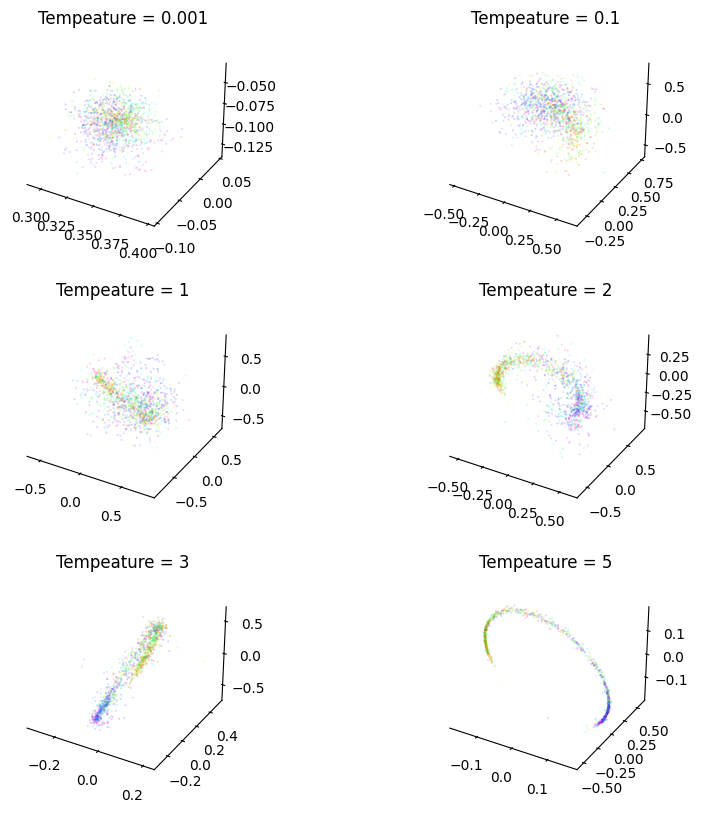

In [36]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [37]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb4 = cebra_time_model_025_comb4.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb4 = cebra_time_model_05_comb4.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb4 = cebra_time_model_075_comb4.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb4 = cebra_time_model_125_comb4.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb4 = cebra_time_model_15_comb4.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb4 = cebra_time_model_175_comb4.transform(X_train)

pos: -2.5238 neg:  9.2787 total:  6.7550 temperature:  0.2500: 100%|██████████| 10000/10000 [04:44<00:00, 35.17it/s]
pos: -1.0380 neg:  7.8793 total:  6.8413 temperature:  0.5000: 100%|██████████| 10000/10000 [04:50<00:00, 34.39it/s]
pos: -0.6772 neg:  7.5938 total:  6.9166 temperature:  0.7500: 100%|██████████| 10000/10000 [04:21<00:00, 38.25it/s]
pos: -0.3995 neg:  7.4036 total:  7.0041 temperature:  1.2500: 100%|██████████| 10000/10000 [04:24<00:00, 37.81it/s]
pos: -0.3353 neg:  7.3751 total:  7.0398 temperature:  1.5000: 100%|██████████| 10000/10000 [04:26<00:00, 37.59it/s]
pos: -0.3045 neg:  7.3618 total:  7.0573 temperature:  1.7500: 100%|██████████| 10000/10000 [04:22<00:00, 38.15it/s]


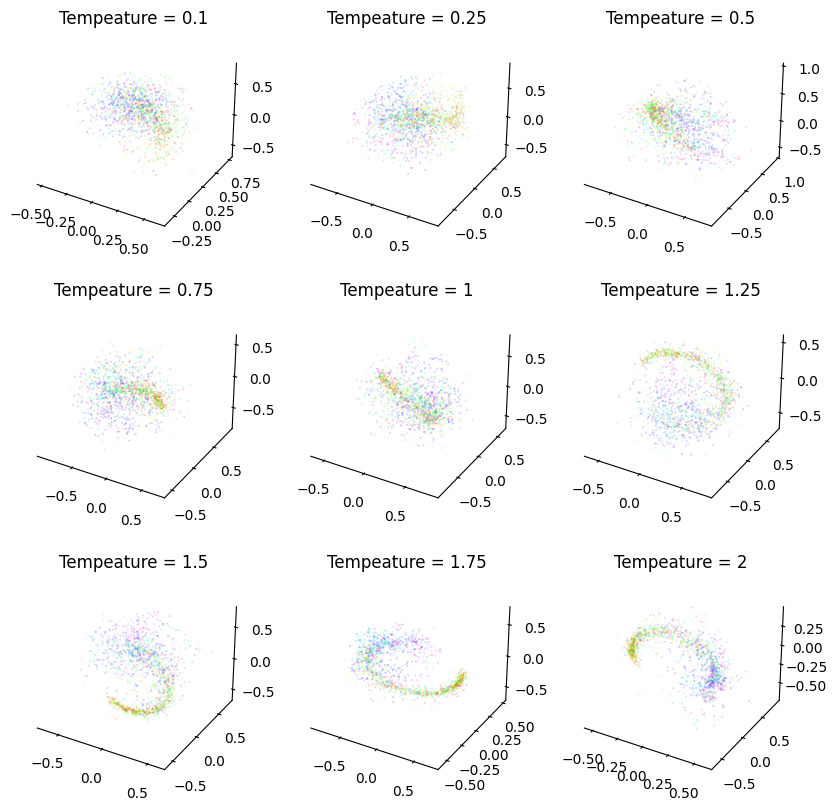

In [38]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [39]:
# Model
cebra_behavior_model_comb4 = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb4.fit(X_train, y_train_comb)
cebra_behavior_model_comb4_embedding = cebra_behavior_model_comb4.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss4 = cebra_behavior_model_comb4.state_dict_['loss']

pos: -0.2646 neg:  7.3356 total:  7.0710 temperature:  2.0000: 100%|██████████| 10000/10000 [05:10<00:00, 32.21it/s]


In [40]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb4_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Speed]",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [ ]:
np.random.seed(999)
# Extract outcomes

# Model_shuffled
cebra_behavior_model_comb4_shuffled = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb4_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb4_embedding_shuffled = cebra_behavior_model_comb4_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss4_shuffled = cebra_behavior_model_comb4_shuffled.state_dict_['loss']

pos: -0.2288 neg:  7.3629 total:  7.1341 temperature:  2.0000:  39%|███▉      | 3914/10000 [02:19<03:34, 28.32it/s]

In [ ]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb4_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Speed] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

In [ ]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb4_embedding {animal_id}.csv"), cebra_behavior_model_comb4_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb4_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb4_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss4, os.path.join(model_dir,f"InfoNCELoss4 {animal_id}.pt"))
torch.save(InfoNCELoss4_shuffled, os.path.join(model_dir,f"InfoNCELoss4_shuffled {animal_id}.pt"))

# 4. Model evaluation

In [58]:
InfoNCELoss1 = torch.load(os.path.join(model_dir, f"InfoNCELoss1 {animal_id}.pt"))
InfoNCELoss1_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss1_shuffled {animal_id}.pt"))
InfoNCELoss2 = torch.load(os.path.join(model_dir, f"InfoNCELoss2 {animal_id}.pt"))
InfoNCELoss2_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss2_shuffled {animal_id}.pt"))
InfoNCELoss3 = torch.load(os.path.join(model_dir, f"InfoNCELoss3 {animal_id}.pt"))
InfoNCELoss3_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss3_shuffled {animal_id}.pt"))
InfoNCELoss4 = torch.load(os.path.join(model_dir, f"InfoNCELoss4 {animal_id}.pt"))
InfoNCELoss4_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss4_shuffled {animal_id}.pt"))

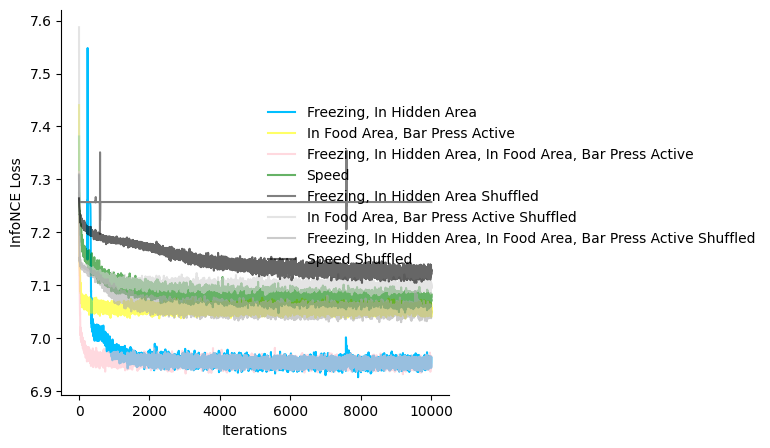

In [59]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot(InfoNCELoss1, c='deepskyblue', label = 'Freezing, In Hidden Area')
ax.plot(InfoNCELoss2, c='yellow', alpha = 0.6, label = 'In Food Area, Bar Press Active')
ax.plot(InfoNCELoss3, c='pink', alpha=0.6,label = 'Freezing, In Hidden Area, In Food Area, Bar Press Active')
ax.plot(InfoNCELoss4, c='green', alpha=0.6,label = 'Speed')
ax.plot(InfoNCELoss1_shuffled, c='gray', label = 'Freezing, In Hidden Area Shuffled')
ax.plot(InfoNCELoss2_shuffled, c='lightgray', alpha = 0.6, label = 'In Food Area, Bar Press Active Shuffled')
ax.plot(InfoNCELoss3_shuffled, c='darkgray', alpha=0.6,label = 'Freezing, In Hidden Area, In Food Area, Bar Press Active Shuffled')
ax.plot(InfoNCELoss4_shuffled, c='black', alpha=0.6,label = 'Speed Shuffled')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Iterations')
ax.set_ylabel('InfoNCE Loss')
plt.legend(bbox_to_anchor=(0.5,0.3), frameon = False )
plt.show()

In [60]:
cebra_behavior_model_comb1_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb1_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb2_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb2_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb3_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb3_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb4_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb4_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb1_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb1_embedding_shuffled {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb2_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb2_embedding_shuffled {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb3_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb3_embedding_shuffled {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb4_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb4_embedding_shuffled {animal_id}.csv"), delimiter = ',')


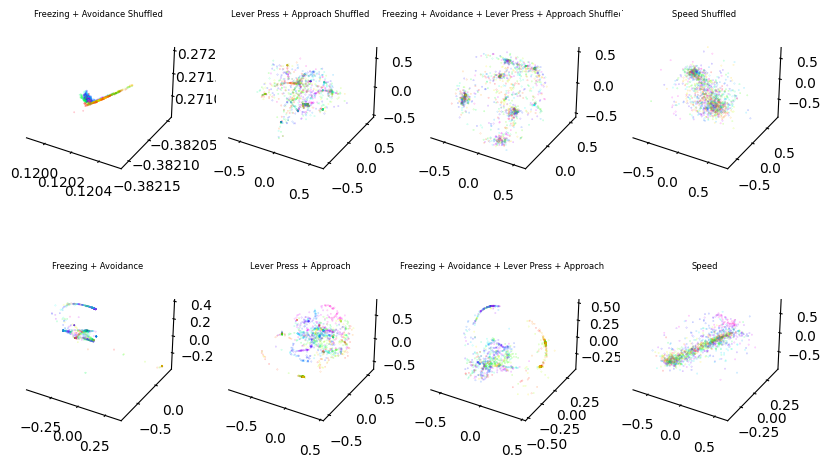

In [62]:
fig=plt.figure(figsize=(10,6))
ax1=plt.subplot(241, projection = '3d')
ax2=plt.subplot(242, projection = '3d')
ax3=plt.subplot(243, projection = '3d')
ax4=plt.subplot(244, projection = '3d')
ax5=plt.subplot(245, projection = '3d')
ax6=plt.subplot(246, projection = '3d')
ax7=plt.subplot(247, projection = '3d')
ax8=plt.subplot(248, projection = '3d')

ax1 = cebra.plot_embedding(ax=ax1, embedding=cebra_behavior_model_comb1_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance Shuffled",
                                                           cmap = "gist_rainbow")

ax2 = cebra.plot_embedding(ax=ax2, embedding=cebra_behavior_model_comb2_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Lever Press + Approach Shuffled",
                                                           cmap = "gist_rainbow")

ax3 = cebra.plot_embedding(ax=ax3, embedding=cebra_behavior_model_comb3_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance + Lever Press + Approach Shuffled",
                                                           cmap = "gist_rainbow")

ax4 = cebra.plot_embedding(ax=ax4, embedding=cebra_behavior_model_comb4_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Speed Shuffled",
                                                           cmap = "gist_rainbow")

ax5 = cebra.plot_embedding(ax=ax5, embedding=cebra_behavior_model_comb1_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance",
                                                           cmap = "gist_rainbow")

ax6 = cebra.plot_embedding(ax=ax6, embedding=cebra_behavior_model_comb2_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Lever Press + Approach",
                                                           cmap = "gist_rainbow")

ax7 = cebra.plot_embedding(ax=ax7, embedding=cebra_behavior_model_comb3_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance + Lever Press + Approach",
                                                           cmap = "gist_rainbow")
ax8 = cebra.plot_embedding(ax=ax8, embedding=cebra_behavior_model_comb4_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Speed",
                                                           cmap = "gist_rainbow")

ax1.title.set_size(6)
ax2.title.set_size(6)
ax3.title.set_size(6)
ax4.title.set_size(6)
ax5.title.set_size(6)
ax6.title.set_size(6)
ax7.title.set_size(6)
ax8.title.set_size(6)

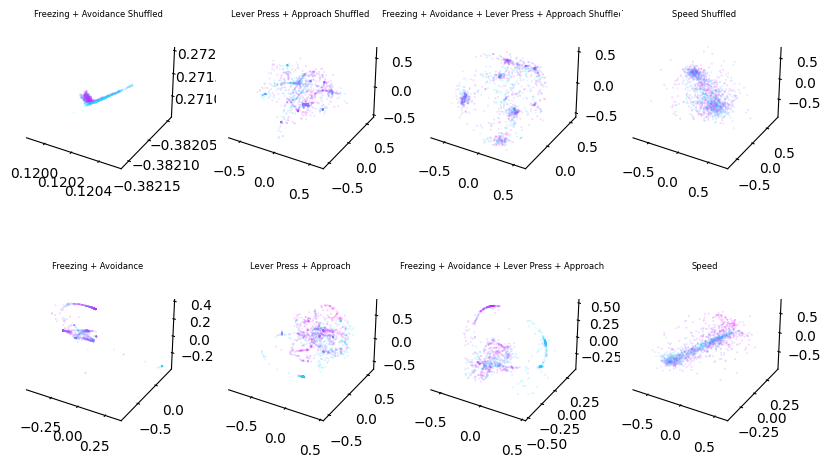

In [61]:
fig=plt.figure(figsize=(10,6))
ax1=plt.subplot(241, projection = '3d')
ax2=plt.subplot(242, projection = '3d')
ax3=plt.subplot(243, projection = '3d')
ax4=plt.subplot(244, projection = '3d')
ax5=plt.subplot(245, projection = '3d')
ax6=plt.subplot(246, projection = '3d')
ax7=plt.subplot(247, projection = '3d')
ax8=plt.subplot(248, projection = '3d')

ax1 = cebra.plot_embedding(ax=ax1, embedding=cebra_behavior_model_comb1_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance Shuffled",
                                                           cmap = "cool")

ax2 = cebra.plot_embedding(ax=ax2, embedding=cebra_behavior_model_comb2_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Lever Press + Approach Shuffled",
                                                           cmap = "cool")

ax3 = cebra.plot_embedding(ax=ax3, embedding=cebra_behavior_model_comb3_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance + Lever Press + Approach Shuffled",
                                                           cmap = "cool")

ax4 = cebra.plot_embedding(ax=ax4, embedding=cebra_behavior_model_comb4_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Speed Shuffled",
                                                           cmap = "cool")

ax5 = cebra.plot_embedding(ax=ax5, embedding=cebra_behavior_model_comb1_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance",
                                                           cmap = "cool")

ax6 = cebra.plot_embedding(ax=ax6, embedding=cebra_behavior_model_comb2_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Lever Press + Approach",
                                                           cmap = "cool")

ax7 = cebra.plot_embedding(ax=ax7, embedding=cebra_behavior_model_comb3_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance + Lever Press + Approach",
                                                           cmap = "cool")
ax8 = cebra.plot_embedding(ax=ax8, embedding=cebra_behavior_model_comb4_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Speed",
                                                           cmap = "cool")

ax1.title.set_size(6)
ax2.title.set_size(6)
ax3.title.set_size(6)
ax4.title.set_size(6)
ax5.title.set_size(6)
ax6.title.set_size(6)
ax7.title.set_size(6)
ax8.title.set_size(6)